In [2]:
import pandas as pd
import plotnine as p9
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.subplots as sp
import seaborn as sns

# R IMPORTATIONS
#%load_ext rpy2.ipython




In [3]:
data_drug = pd.read_csv('drug_consumption_clean.csv')
data_drug.head()

,age,gender,education,country,n_score,e_score,o_score,a_score,c_score,impulsive,sensation_seeing,alcohol,caffeine,nicotine,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
0,35-44,Female,Estudios de FP,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,1,1,0,0,0,0,0
1,25-34,Male,Estudios superiores,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,1,1,1,0,0
2,35-44,Male,Estudios de FP,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,1,0,1,0,0,0
3,18-24,Female,Estudios superiores,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,1,0,0,0,1,0
4,35-44,Female,Estudios superiores,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,1,0,1,0,0,0


In [4]:
data_drug = data_drug.sort_values(by='age')

<function matplotlib.pyplot.show(close=None, block=None)>

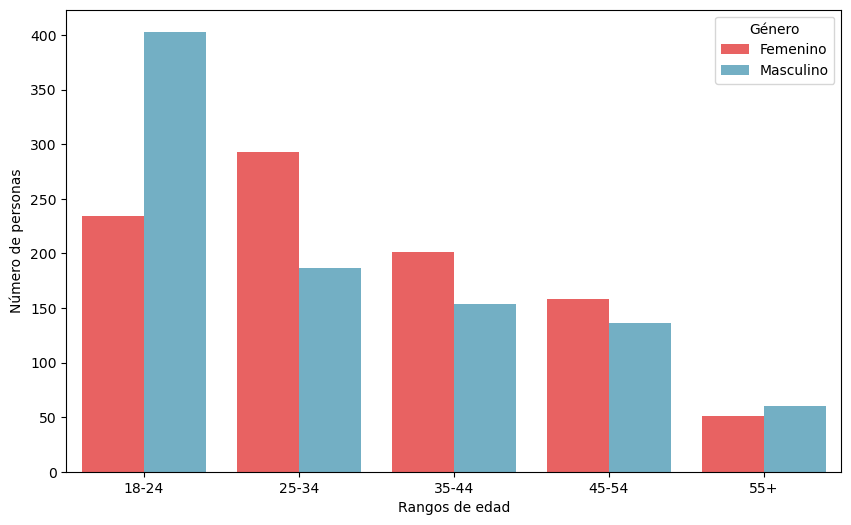

In [11]:
plt.figure(figsize=(10,6))
colors = ["red", "#2596be"]
alpha = 0.7  # Transparency level
GenderPlot = sns.countplot(x = 'age', hue = 'gender', data = data_drug, palette=colors, alpha=alpha)
GenderPlot.set(ylabel='Número de personas', xlabel='Rangos de edad')
plt.legend(title ='Género', loc = 'upper right', labels =['Femenino', 'Masculino'])
plt.show

El análisis de los datos demográficos de la muestra revela una distribución interesante en términos de género y grupos de edad. En todos los grupos de edad, excepto en los de 18 a 24 años y 55 años o más, se observa una mayor representación de mujeres que de hombres. 

El grupo de edad con la mayor representación en la muestra es el de 18 a 24 años, que cuenta con 400 hombres y aproximadamente 240 mujeres. Este grupo de edad representa una proporción significativa de la muestra, lo que podría tener implicaciones importantes para cualquier análisis o interpretación de los datos.

El siguiente grupo de edad con mayor representación es el de 25 a 34 años, con 200 hombres y 300 mujeres. Aunque este grupo tiene menos hombres que el grupo de 18 a 24 años, tiene un mayor número de mujeres, lo que refuerza la observación de que las mujeres están más representadas en la mayoría de los grupos de edad.

Por último, el grupo de edad con la menor representación en la muestra es el de 55 años o más, con aproximadamente 125 hombres y 100 mujeres. 

En resumen, los datos demográficos de la muestra presentan una distribución variada en términos de género y grupos de edad. Estas diferencias podrían tener implicaciones significativas para cualquier análisis o interpretación de los datos y deben ser consideradas cuidadosamente.

In [3]:
data_drug_by_gender = data_drug.drop(columns=['age','education','country','n_score', 'e_score', 'o_score', 'c_score','a_score', 'impulsive', 'sensation_seeing'])

NameError: name 'data_drug' is not defined

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




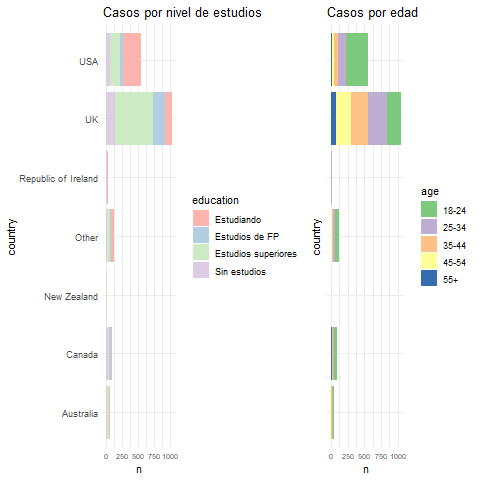

In [5]:
%%R -i data_drug

library(ggplot2)
library(dplyr)
library(cowplot)

data_drug$country <- as.factor(data_drug$country)
data_drug$education <- as.factor(data_drug$education)

p1 <- data_drug %>% 

  count(country, education) %>% 
  ggplot()+
  geom_col(mapping = aes(x = country, y = n, fill = education))+
  scale_fill_brewer(type = "qual", palette = 4, na.value = "grey")+
  coord_flip()+
  theme_minimal()+
  labs(title = "Casos por nivel de estudios")+
  theme(axis.text.x = element_text(size = 7))

p2 <- data_drug %>% 

  count(country, age) %>% 
  ggplot()+
  geom_col(mapping = aes(x = country, y = n, fill = age))+
  scale_fill_brewer(type = "qual", palette = 1, na.value = "grey")+
  coord_flip()+
  theme_minimal()+
  theme(axis.text.y = element_blank())+
  labs(title = "Casos por edad")+
  theme(axis.text.x = element_text(size = 7))

plot_grid(p1, p2, rel_widths = c(1.75, 1))

El dataset considera las categorías USA, UK, Republic of Ireland, New Zelandia, Canada, Australia y Others para los países de origen de los encuestados. La muestra agrupa  mayor respresentación de los países USA y UK, mientras que el resto de categorías, especialmente Republic of Ireland y New Zeland, son los países con menor representación.

Ahora bien, cualquier generalización con este tamaño de muestra es falaz, por el principio básico del muestro: La muestra debe ser aleatoria y lo suficientemente grande para poder establecer generalizaciones. Por lo tanto, para el análisis posterior de los datos, no se debe tener en cuenta disgregaciones por país

Respecto al nivel de estudios, se observa que para UK la muestra se encuentra más representada por personas con estudios superiores, seguido por personas con Estudios FP, mientras que para USA las personas con mayor representación son las que se encuentran Estudiando, seguido de personas con Estudios superiores. Para ambos países la categoría sin estudios tienen bajo valor ponderado.

Finalmente, respecto a la edad, se tiene que para UK la población se encuentra normalmente distribuida para los rangos especificados, teniendo mayor representación para las personas entre 25-34 años y menor representación para las personas mayores de 55 años


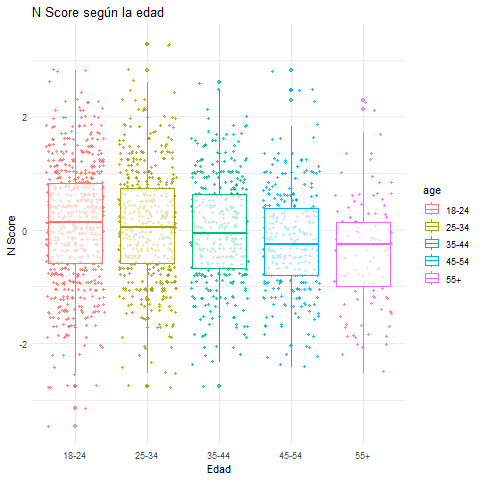

In [6]:
%%R -i data_drug

library(ggplot2)
library(dplyr)
library(cowplot)

ggplot(data = data_drug, aes(x = age, y = n_score)) + 
  geom_jitter(aes(color = age), size = 1, alpha = 0.7) +
  geom_boxplot(aes(color = age), alpha = 0.7) + 
  xlab('Edad') + 
  ylab('N Score') +
  ggtitle('N Score según la edad') + 
  theme_minimal()

In [8]:
data_drug_by_age = data_drug.drop(columns=['gender','education','country','n_score', 'e_score', 'o_score', 'c_score','a_score', 'impulsive', 'sensation_seeing'])

In [9]:
drugs_agg = data_drug_by_age.groupby("age")[["alcohol", "caffeine","nicotine","recreational_drugs",'stimulant_drugs','sedative_drugs','high_risk_drugs']].agg('mean')
drugs_agg

,alcohol,caffeine,nicotine,recreational_drugs,stimulant_drugs,sedative_drugs,high_risk_drugs
age,,,,,,,
18-24,0.959184,0.979592,0.755102,0.857143,0.571429,0.678179,0.238619
25-34,0.943750,0.968750,0.564583,0.531250,0.389583,0.445833,0.139583
35-44,0.904225,0.969014,0.461972,0.369014,0.222535,0.292958,0.076056
45-54,0.894558,0.945578,0.343537,0.268707,0.170068,0.227891,0.034014
55+,0.846847,0.945946,0.324324,0.252252,0.117117,0.180180,0.018018


In [37]:
categories = drugs_agg.columns.tolist()

fig = sp.make_subplots(rows=2, cols=3, horizontal_spacing=0.2, specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}, {}]])

for i in range(len(drugs_agg.index)):
    fig.add_trace(go.Scatterpolar(
      r=drugs_agg.iloc[i],
      theta=categories,
      fill='toself',
      name=drugs_agg.index[i]
    ), row=i//3+1, col=i%3+1)

fig.update_layout(height=800, width=1500)
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1])))
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1])), polar2=dict(radialaxis=dict(range=[0, 1])), polar3=dict(radialaxis=dict(range=[0, 1])), polar4=dict(radialaxis=dict(range=[0, 1])), polar5=dict(radialaxis=dict(range=[0, 1])), polar6=dict(radialaxis=dict(range=[0, 1])))

fig.show()


In [11]:
# Melt the DataFrame from wide to long format
drugs_agg_long = drugs_agg.transpose()

In [36]:
categories = drugs_agg_long.columns.tolist()

fig = sp.make_subplots(rows=2, cols=4, horizontal_spacing=0.1, specs=[[{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}], [{'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}, {'type': 'polar'}]])

for i in range(len(drugs_agg_long.index)):
    fig.add_trace(go.Scatterpolar(
      r=drugs_agg_long.iloc[i],
      theta=categories,
      fill='toself',
      name=drugs_agg_long.index[i]
    ), row=i//4+1, col=i%4+1)

fig.update_layout(height=800, width=1500)
fig.update_layout(polar=dict(radialaxis=dict(range=[0, 1])), polar2=dict(radialaxis=dict(range=[0, 1])), polar3=dict(radialaxis=dict(range=[0, 1])), polar4=dict(radialaxis=dict(range=[0, 1])), polar5=dict(radialaxis=dict(range=[0, 1])), polar6=dict(radialaxis=dict(range=[0, 1])), polar7=dict(radialaxis=dict(range=[0, 1])), polar8=dict(radialaxis=dict(range=[0, 1])))

fig.show()
